IMPORTING THE LIBRARIES

In [244]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASET

In [245]:
df=pd.read_csv('wine_dataset.csv')

UNDERSTANDING THE COLUMNS

In [246]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

Observation:
type: type of the wine (redd/white)

fixed acidity – Non-volatile acids that do not evaporate easily and contribute to the wine’s taste.

volatile acidity – Acids that can evaporate and may cause an unpleasant vinegar taste if too high.

citric acid – A natural acid that adds freshness and flavor to the wine.

residual sugar – The amount of sugar remaining after fermentation, contributing to sweetness.

chlorides – Amount of salt in the wine, affecting taste and preservation.

free sulfur dioxide – SO₂ in its active form, used to prevent microbial growth and oxidation.

total sulfur dioxide – Total amount of SO₂, including both free and bound forms.

density – The mass-to-volume ratio of the wine, related to sugar and alcohol content.

pH – Measures the acidity or basicity of the wine; lower pH means higher acidity.

sulphates – Additives that enhance preservation and contribute to antimicrobial stability.

alcohol – The percentage of ethanol in wine, affecting flavor and body.

quality – A score (typically 0–10) representing the sensory quality of the wine, given by experts.



In [247]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Get the information of the columns 

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [249]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

observation:

missing data:fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates

                                                        Data cleaning                                                                                  

1. Check and remove the duplicate

In [250]:
df.duplicated().any()

np.True_

observation:
duplicates values are present

In [251]:
df=df.drop_duplicates()

2. Handle the missing values

In [252]:
df['fixed acidity']=df['fixed acidity'].fillna(df['fixed acidity'].mean())
df['volatile acidity']=df['volatile acidity'].fillna(df['volatile acidity'].mean())
df['citric acid']=df['citric acid'].fillna(df['citric acid'].mean())
df['residual sugar']=df['residual sugar'].fillna(df['residual sugar'].mean())
df['chlorides']=df['chlorides'].fillna(df['chlorides'].mean())
df['pH']=df['pH'].fillna(df['pH'].mean())
df['sulphates']=df['sulphates'].fillna(df['sulphates'].mean())

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   object 
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 582.9+ KB


                                                   Data Transformation                                                            

1.converting quality into categories

In [254]:
def quality_level(value):
    if value <= 4:
        return 'Low'
    elif value <= 6:
        return 'Medium'
    else:
        return 'High'

df['quality_level'] = df['quality'].apply(quality_level)

In [255]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,Medium


2. Create a new column Alcohol_level

In [256]:
df['alcohol_level'] = pd.cut(df['alcohol'], bins=[0, 10, 12, 15], labels=['Low', 'Medium', 'High'])
#categorizing the alcohol content

3. Replacing the values

In [257]:
df['type'] = df['type'].map({'red': 0, 'white': 1})

                                                DATA ANALYSIS                                                                              

1.What are the unique types of wine available in the dataset?

In [258]:
print(df['type'].unique())


[1 0]


--> 0 represents red wine

--> 1 representd white wine

2. How many red and white wines are there?

In [259]:
df['type'].value_counts()


type
1    3970
0    1359
Name: count, dtype: int64

3.What is the correlation between alcohol content and quality?

In [260]:
df[['alcohol', 'quality']].corr()

,alcohol,quality
alcohol,1.000000,0.469555
quality,0.469555,1.000000


4. Which wine type generally has higher alcohol content on average?

In [261]:
df.groupby('type')['alcohol'].mean()

type
0    10.432315
1    10.588324
Name: alcohol, dtype: float64

5.Get the count of red wine having quality above 7?

In [262]:
df[(df['type'] == 'red') & (df['quality'] > 7)].shape[0]

0

6.How many wines have a quality score above 7?

In [263]:
df[df['quality'] > 7].shape[0]

154

7. find average alcohol content for each quality label?

In [264]:
df.groupby('quality_level')['alcohol'].mean()

quality_level
High      11.572733
Low       10.215042
Medium    10.314155
Name: alcohol, dtype: float64

8. What is the distribution of wine quality ratings?

In [265]:
df['quality'].value_counts().sort_index()

quality
3      30
4     206
5    1755
6    2327
7     857
8     149
9       5
Name: count, dtype: int64

                                   ANALYSIS USING PLOTS                                                                                   

1.Get the count of wine fall under each quality review?

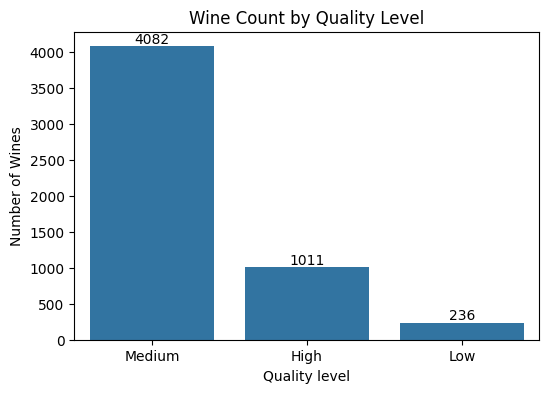

In [266]:
plt.figure(figsize=(6, 4))
c=sns.countplot(x='quality_level', data=df)
c.bar_label(c.containers[0])
plt.title('Wine Count by Quality Level')
plt.xlabel('Quality level')
plt.ylabel('Number of Wines')
plt.show()

Observation:

--> data distribution is right-skewed

--> Medium Quality wines are more

2. How is the quality of wine distributed?

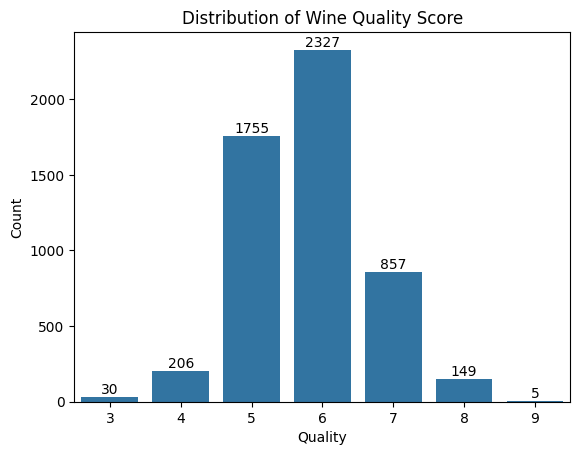

In [267]:
c=sns.countplot(x='quality', data=df)
c.bar_label(c.containers[0])
plt.title('Distribution of Wine Quality Score')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

observation:

--> Most wines have a quality score as a 6.

3.What is the relationship between alcohol and residual sugar ?

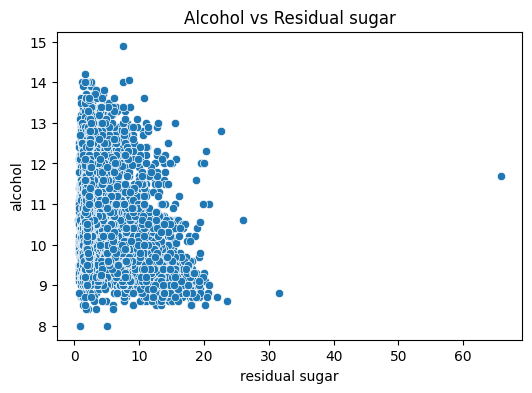

In [268]:
plt.figure(figsize=(6,4))
sns.scatterplot(y='alcohol', x='residual sugar', data=df)
plt.title('Alcohol vs Residual sugar')
plt.show()

Observation:

--> Residual Sugar (g/L) represents the amount of sugar left after fermentation.

--> The scatter plot shows a wide spread of data points with no clear linear pattern or trend.

--> Wines with high residual sugar generally have lower alcohol content.

--> A few outliers are present with very high residual sugar levels.

--> There is a weak negative relationship between residual sugar and alcohol.

--> Alcohol levels tend to remain high when residual sugar is low, and slightly decrease as residual sugar increases.

4.count of each wine type

C:\Users\Divya Gowda\AppData\Local\Temp\ipykernel_6288\2599094975.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c=sns.countplot(x='type', data=df, palette='Set2')


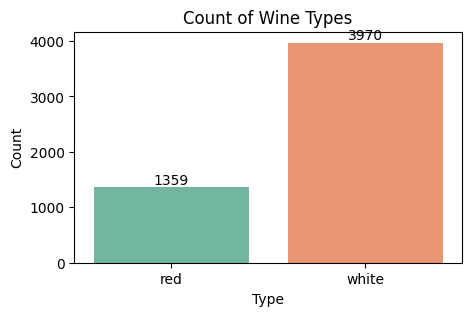

In [269]:
plt.figure(figsize=(5,3))
c=sns.countplot(x='type', data=df, palette='Set2')
for container in c.containers:
    c.bar_label(container)
plt.title('Count of Wine Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(ticks=(0,1),labels=('red','white'))
plt.show()


Observation:

--> There are more white wines than red wines in the dataset. 

5.Quality level vs Alcohol,chlorides,residual sugar using box plot

C:\Users\Divya Gowda\AppData\Local\Temp\ipykernel_6288\454992508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_level', y='alcohol', data=df, palette='Set2')
C:\Users\Divya Gowda\AppData\Local\Temp\ipykernel_6288\454992508.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_level', y='chlorides', data=df, palette='Set3')
C:\Users\Divya Gowda\AppData\Local\Temp\ipykernel_6288\454992508.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality_level', y='residual sugar', data=df, palette='Set1')


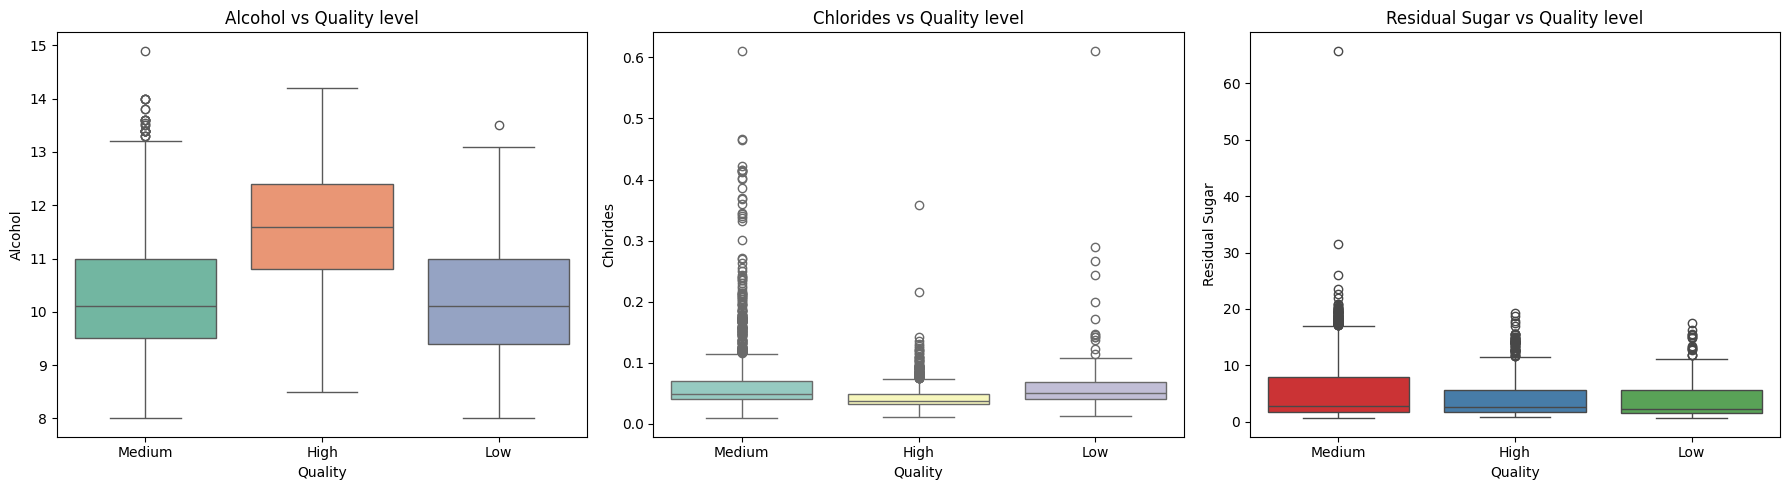

In [270]:
plt.figure(figsize=(18, 5)) 

plt.subplot(1, 3, 1)
sns.boxplot(x='quality_level', y='alcohol', data=df, palette='Set2')
plt.title('Alcohol vs Quality level')
plt.xlabel('Quality')
plt.ylabel('Alcohol')

plt.subplot(1, 3, 2)
sns.boxplot(x='quality_level', y='chlorides', data=df, palette='Set3')
plt.title('Chlorides vs Quality level')
plt.xlabel('Quality')
plt.ylabel('Chlorides')

plt.subplot(1, 3, 3)
sns.boxplot(x='quality_level', y='residual sugar', data=df, palette='Set1')
plt.title('Residual Sugar vs Quality level')
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')

plt.tight_layout()
plt.show()

observation

Alcohol vs Quality level

--> There is a positive correlation between alcohol content and wine quality

--> Higher-quality wines tend to have higher alcohol content

Chlorides vs Quality level

--> High and Medium quality wines tend to have lower chloride levels.

--> Low quality wines show a slightly higher median and more outliers in chlorides.

--> There's a mild negative relationship between chlorides and quality.(Excessive chlorides (salty taste) may negatively affect wine taste, lowering the quality.)

Residual Sugar vs Quality Level

--> The residual sugar distribution is highly skewed, with numerous extreme outliers, especially in the Medium quality group.

--> The median values for residual sugar are quite similar across Low, Medium, and High quality wines.

--> There is no clear trend or consistent variation of residual sugar with respect to wine quality.



                                                         FINAL ANALYSIS                                                                                    

--> Alcohol and Chlorides are the most influential factors affecting wine quality.

--> Residual sugar, pH, and density show little to no impact on quality.

--> high-quality wines tend to have moderate sugar levels, suggesting that too much sugar doesn't necessarily lead to better ratings.

--> White wines dominate the dataset and also contain more high-quality entries.

--> Sulphates and pH show mild relationships with quality.

--> High Quality wines have higher alcohol levels,shows positive correlation.


